<a href="https://colab.research.google.com/github/Kshitijasharma/celebal_internship/blob/main/Project_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import all the required lib
import pandas as pd
import numpy as np

In [8]:
#loading the dataset
df=pd.read_csv('Mall_Customers.csv')

## Analysing the dataset

In [9]:
df.shape  #No. of rows=200, no.of columns=5

(200, 5)

In [10]:
df.columns #will display the column names

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.dtypes  #return the datatypes of variables in the dataset

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [12]:
df.head()   #will display few starting rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.tail()  #will display few ending rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
df.info()    #it tells the data is okay, no null values existing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe().T       #return complete statistical information column wise( numerical columns only )


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**DATA CLEANING**

In [16]:
#create a copy of dataset, so that we can retrive to the original one if something went wrong
df_copy=df.copy(deep=True)
df_copy.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Dropping the column of 'CustomerID' as it does not provide any value
df_copy.drop('CustomerID', axis=1, inplace=True)
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

**DATA VISUALISATION**

In [18]:
# Loading essential libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

**GENDER ANALYSIS**

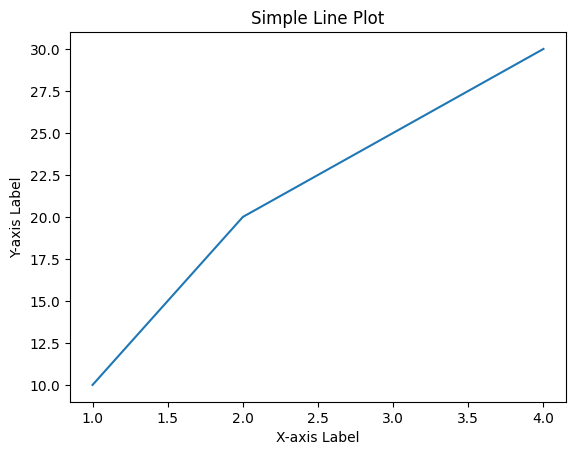

In [34]:
#understanding matplotlib
""""import matplotlib.pyplot as plt

# Simple line plot
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.show()
""


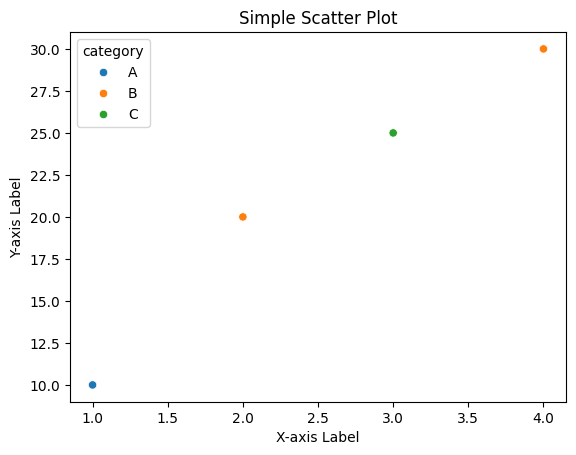

In [36]:
#understanding sns
"""import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'x': [1, 2, 3, 4],
    'y': [10, 20, 25, 30],
    'category': ['A', 'B', 'C', 'B']
})

# Simple scatter plot
sns.scatterplot(x='x', y='y', hue='category', data=data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Scatter Plot')
plt.show()
""

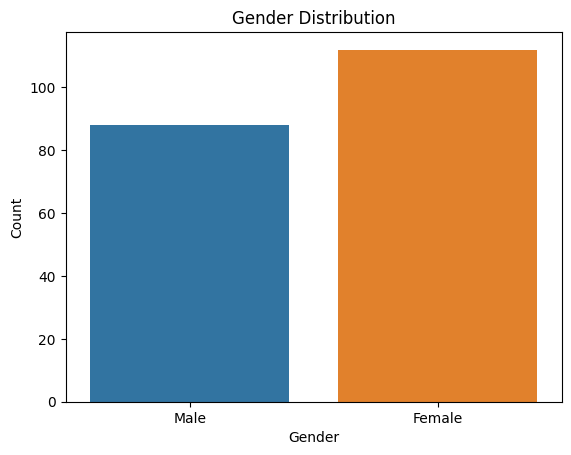

In [20]:
sns.countplot(x='Gender',data=df_copy,hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

**Age Plot**

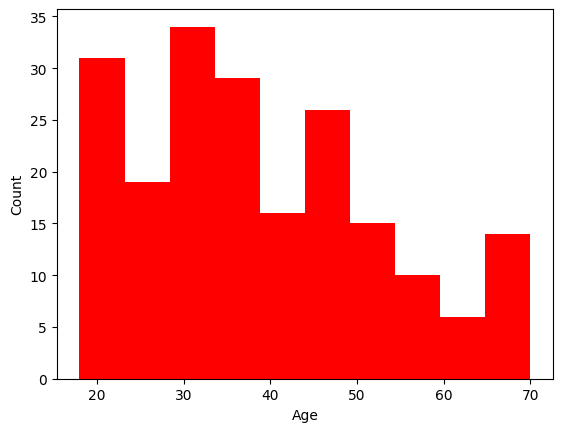

In [21]:
plt.hist(x=df_copy['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Age Vs Spending Score**

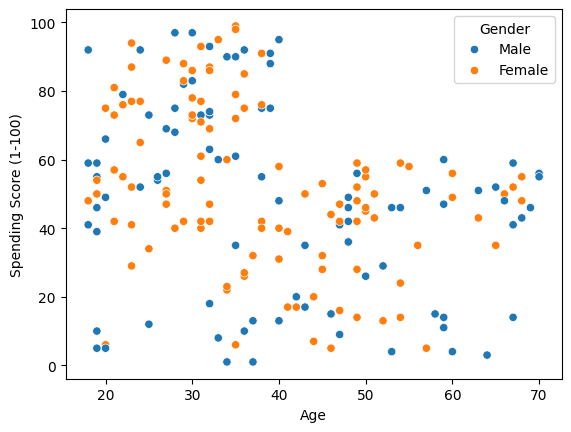

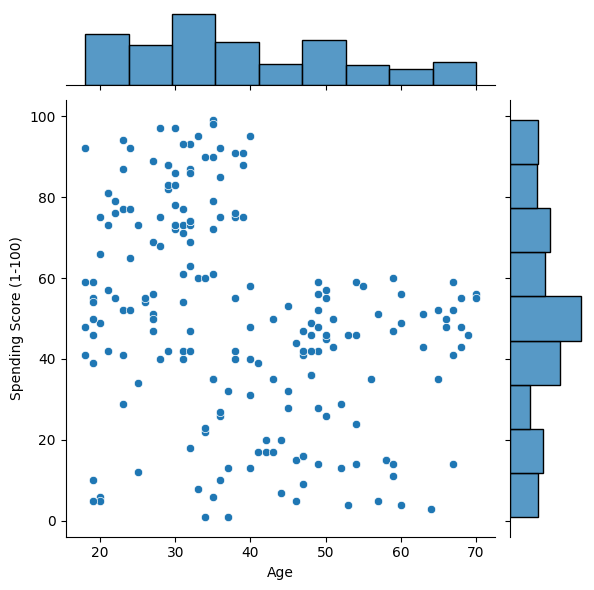

In [23]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Age', y='Spending Score (1-100)')

**Annual Income Vs Spending Score**


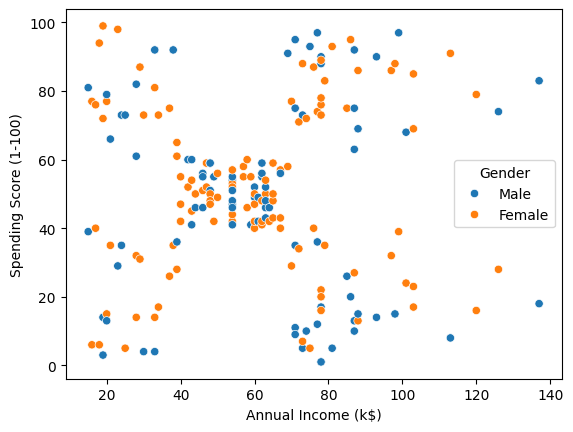

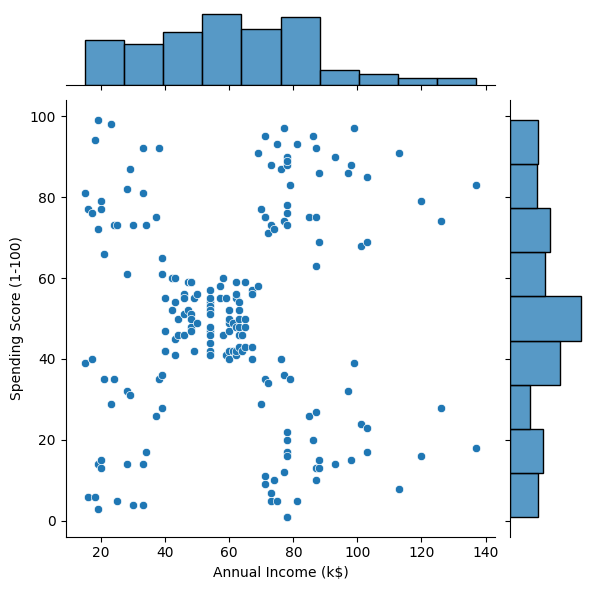

In [24]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)')

## Data Preprocessing

In [26]:
#selecting 'annual income' and 'spending score' as the features for clustering
X = df_copy.iloc[:,[2,3]]

In [27]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Finding optimal number of clusters using Elbow Method

In [33]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

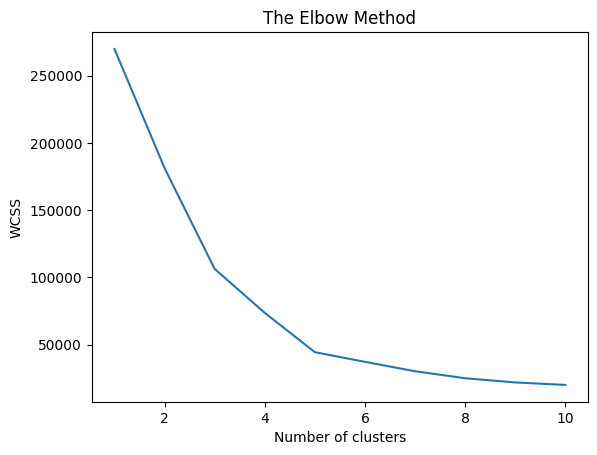

In [34]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The graph shown below depicts that *5 clusters* are possible(optimal) for the given dataset.

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Clusters

In [38]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


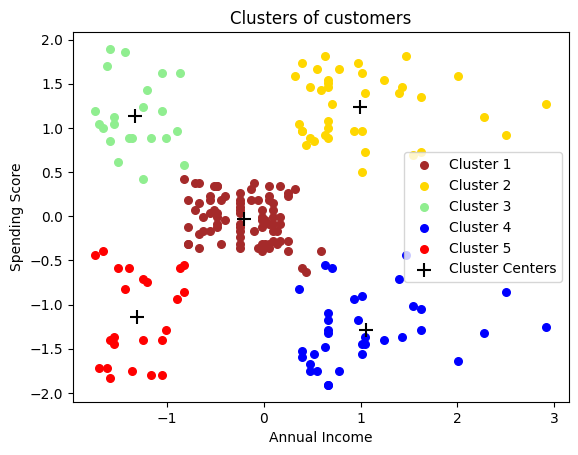

In [41]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'brown', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'gold', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'blue', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

*## Please refer to the report, where I have provided a detailed explanation.*